In [1]:
import tweepy


In [3]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
consumerKey='iL2KI650FefaLUj8X8yh0xKmo'
consumerSecret='bHfmdHDc9wIifVW26Gw9XqAGhpS9XyRAe6HxxWXGzUDtkUf38o'
accessToken='1195745298582106112-EZi82yH3RTahSCBMToXBFlERp7Fxqu'
accessTokenSecret='Fjk9XgOT3y7nug3Z6VXNBQbXrD10HoXRIR52wVdbiGqR7'

In [27]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)


In [28]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")
i=1
for tweet in posts[0:5]:
    print(str(i) + ')'+tweet.full_text+'\n')
    i=i+1

1).@StephenCurry30’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. https://t.co/dpDh3WHR3W

2)Dr. Tunji Funsho’s work with @Rotary was essential in stopping wild polio in Africa and will help create a polio-free world for all. A well-deserved recognition. https://t.co/CT1muyPyS3

3)This honor is well deserved. COVID-19 is not just a health crisis—it is also now a food crisis, and @WFP is there to respond. I’m inspired by the thousands of people in the organization who have committed their lives to fighting hunger. https://t.co/WC5bAFO5FH

4)For the last 25 years, Dr. Firdausi Qadri, an immunologist and infectious disease researcher in Bangladesh, has been working to protect entire communities from cholera epidemics. https://t.co/F2pQiIYqry

5)I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. https://t.co/ZadPiUS73z



In [29]:
#create a data frame with a column called tweets
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
#show the first 5 rows of data
df.head()

,Tweets
0,.@StephenCurry30’s work in the community is as...
1,Dr. Tunji Funsho’s work with @Rotary was essen...
2,This honor is well deserved. COVID-19 is not j...
3,"For the last 25 years, Dr. Firdausi Qadri, an ..."
4,I’m excited to see this kind of innovation. De...


In [30]:
#cleaning the data set

#function for cleaning the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,.’s work in the community is as inspiring as h...
1,Dr. Tunji Funsho’s work with was essential in...
2,This honor is well deserved. COVID-19 is not j...
3,"For the last 25 years, Dr. Firdausi Qadri, an ..."
4,I’m excited to see this kind of innovation. De...
...,...
95,Halting funding for the World Health Organizat...
96,. does an amazing job capturing the heroism of...
97,On WorldHealthDay — and every day — I want to ...
98,I always enjoy chatting with even though we h...


In [31]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,.’s work in the community is as inspiring as h...,0.625000,0.425000
1,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.050000
2,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000
3,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000
4,I’m excited to see this kind of innovation. De...,0.737500,0.243750
...,...,...,...
95,Halting funding for the World Health Organizat...,0.591667,-0.012500
96,. does an amazing job capturing the heroism of...,0.900000,0.600000
97,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000
98,I always enjoy chatting with even though we h...,0.437500,-0.009375


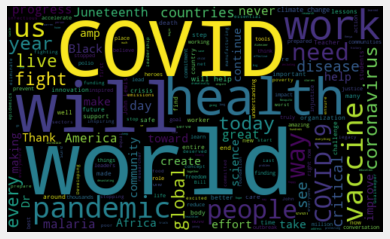

In [32]:
#Plot The word cloud
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
#create a function to compute the negative ,neutral and positive analysis

def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df
    

,Tweets,Subjectivity,Polarity,Analysis
0,.’s work in the community is as inspiring as h...,0.625000,0.425000,Positive
1,Dr. Tunji Funsho’s work with was essential in...,0.350000,0.050000,Positive
2,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000,Neutral
3,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.345833,0.000000,Neutral
4,I’m excited to see this kind of innovation. De...,0.737500,0.243750,Positive
...,...,...,...,...
95,Halting funding for the World Health Organizat...,0.591667,-0.012500,Negative
96,. does an amazing job capturing the heroism of...,0.900000,0.600000,Positive
97,On WorldHealthDay — and every day — I want to ...,0.500000,0.500000,Positive
98,I always enjoy chatting with even though we h...,0.437500,-0.009375,Negative


In [37]:
#printing the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0] ):
    if (sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) .’s work in the community is as inspiring as his amazing record on the basketball court. I really appreciated the thoughtful conversation. 

2) Dr. Tunji Funsho’s work with  was essential in stopping wild polio in Africa and will help create a polio-free world for all. A well-deserved recognition. 

3) I’m excited to see this kind of innovation. Detecting and predicting outbreaks earlier is critical to preventing epidemics. 

4) The only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. By making sure poor countries are equipped to stop this disease, wealthy countries will help themselves and bring this crisis to an end sooner. 

5) Understanding this concept can help us measure our progress toward eliminating carbon emissions and serve as a guide to action. 

6) Developing and manufacturing vaccines won’t end the pandemic quickly unless we also deliver them equitably. Here is why it’s critical that vaccines are distributed in proportion to the global 

In [41]:
#printing the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0] ):
    if (sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j=j+1

1) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

2) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

3) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

4) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

5) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

6) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Junetee

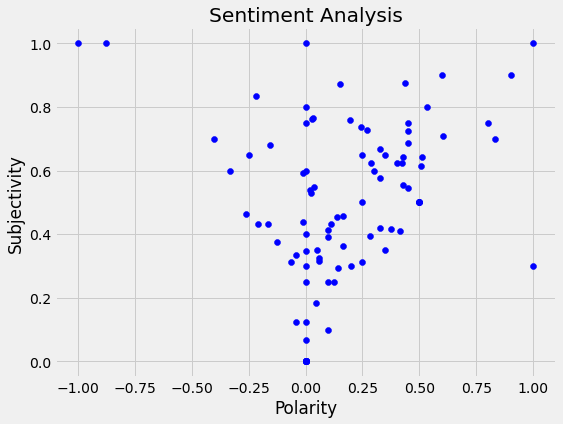

In [45]:
#ploting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [46]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

61.0

In [47]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

16.0

In [48]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

23.0

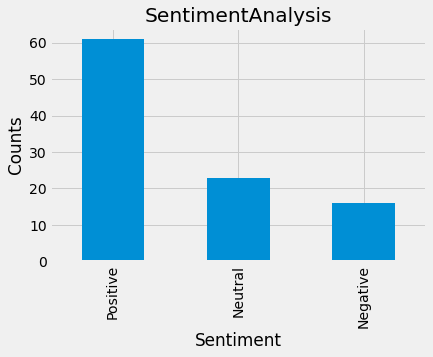

In [49]:
#show the value counts
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()